# Location or Size: What Influences House Prices in Mexico?

In [1]:

import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("../data/mexico-real-estate-clean.csv")
# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de M�xico,19.560181,-99.233528,150,67965.56
1,house,Nuevo Le�n,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucat�n,21.052583,-89.538639,205,105191.37


# Use the groupby method to create a Series named mean_price_by_state, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price.

In [3]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Quer�taro           133955.913281
Guanajuato          133277.965833
Nuevo Le�n          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

# Use mean_price_by_state to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price [USD]", and give the chart the title "Mean House Price by State"

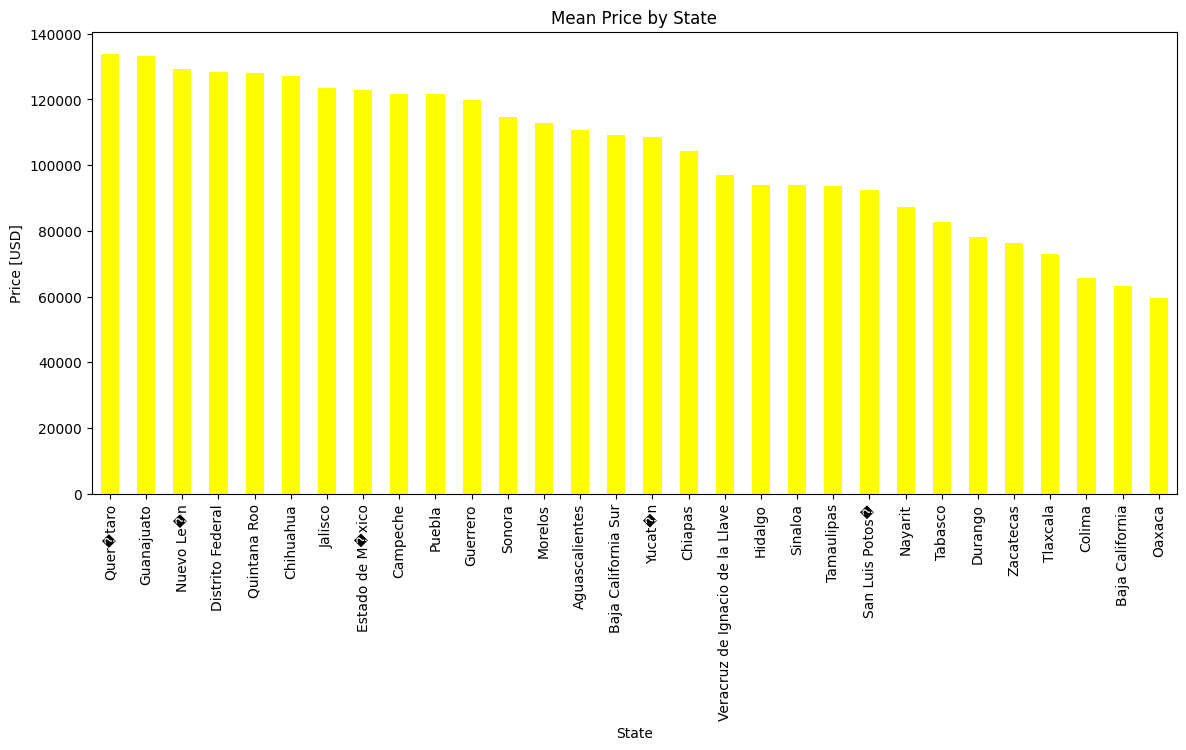

In [44]:
mean_price_by_state.plot(
    kind='bar',
    rot= 90,
    xlabel='State',
    color='#FFFF00',
    ylabel='Price [USD]',
    title='Mean Price by State',
    figsize=(14, 6)
);

# Combined bar and line chart, add a line

AttributeError: 'Axes' object has no attribute 'xticks'

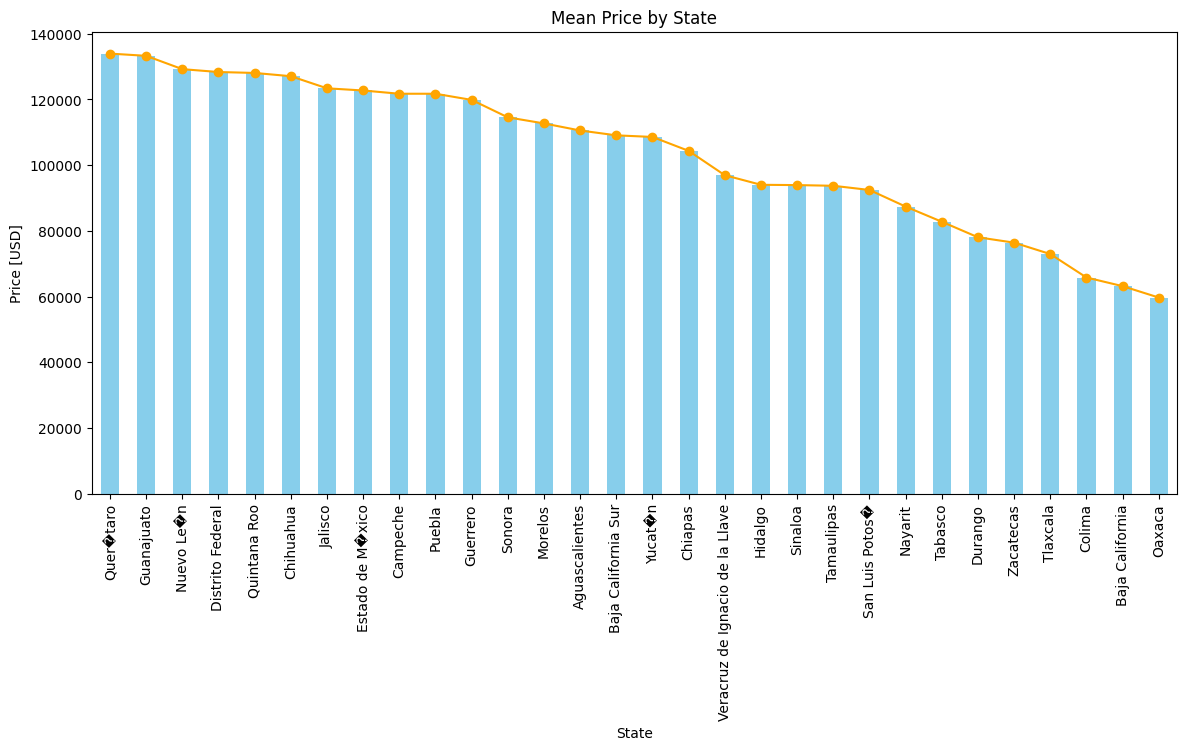

In [48]:
# Create the bar plot
ax = mean_price_by_state.plot(
    kind='bar', 
    color='#87CEEB', 
    legend=False,
    figsize=(14, 6)
)
# Add a line plot over the bar plot
ax.plot(
    mean_price_by_state.index, 
    mean_price_by_state.values, 
    marker='o', 
    linestyle='-', 
    color='#FFA500', 
    label='Trend Line'
)

# Customize labels and title
ax.set_xlabel('State')
ax.set_ylabel('Price [USD]')
ax.set_title('Mean Price by State')

# Rotate x-axis labels for better readability
ax.xticks(rotation=90)

# Show legend
ax.legend()
# Show plot
plt.show()

# Make Trend line using numpy

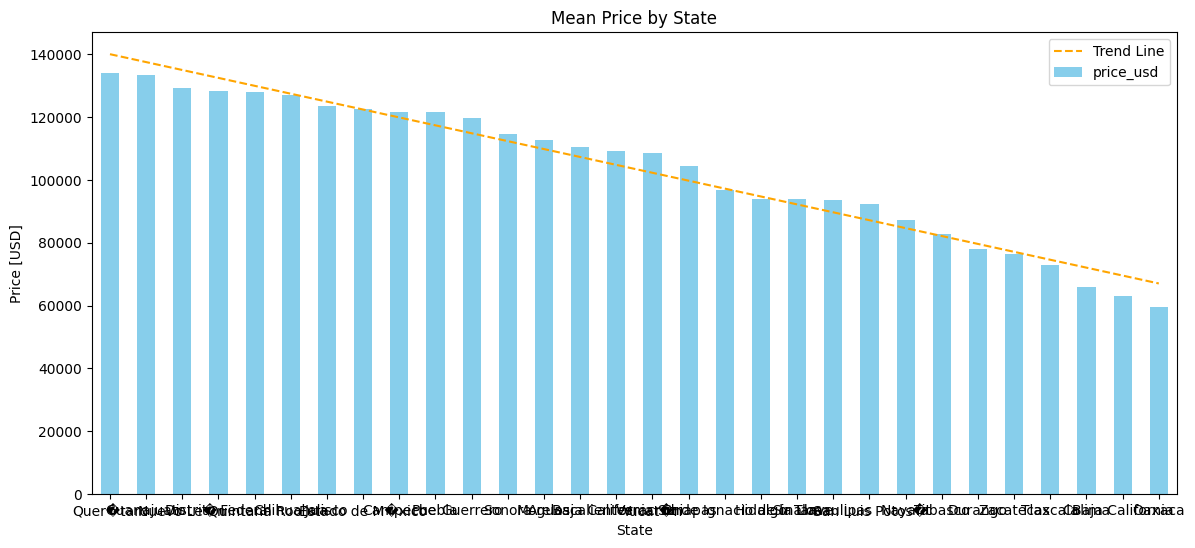

In [50]:
import numpy as np

# Create the bar plot
ax = mean_price_by_state.plot(
    kind='bar', 
    color='#87CEEB',
    figsize=(14, 6),
    legend=False
)

# Create a trendline using numpy's `polyfit`
x = np.arange(len(mean_price_by_state.index))
y = mean_price_by_state.values
z = np.polyfit(x, y, 1)  # Degree = 1 for a linear trendline
p = np.poly1d(z)

# Plot the trendline over the bar plot
ax.plot(mean_price_by_state.index, p(x), color='#FFA500', linestyle='--', label='Trend Line')

# Customize labels and title
ax.set_xlabel('State')
ax.set_ylabel('Price [USD]')
ax.set_title('Mean Price by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show legend
ax.legend()

# Show plot
plt.show()
